In [1]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
# vim:fenc=utf-8
# File name: test.py
# First Edit: 2020-02-13
# Last Change: 13-Feb-2020.
"""
adb kill-server
adb start-server
adb device -l
adb shell dumpsys display
"""

import io
import os
import subprocess

import cv2
import numpy as np
import pytesseract
import sys
from adbutils import adb
from matplotlib import pyplot as plt
from PIL import Image
from ppadb.client import Client as AdbClient
from scipy import misc
from IPython.display import display
from ipywidgets import interact, IntRangeSlider
import datetime 
from time import time, sleep
client = AdbClient(host="127.0.0.1", port=5037)

In [2]:
client = AdbClient(host="127.0.0.1", port=5037)

In [3]:
device = client.device("8AFY0K7DR")

In [45]:
def get_screenshot(file_name="test.png"):
    result = device.screencap()
    with open(file_name, "wb") as fp:
        fp.write(result)

    return file_name


def show_screenshot():
    display(Image.open(get_screenshot("tmp")))
    os.remove("tmp")

def data2array(data):
    return np.asarray(data)

def read_png(name):
    return data2array(plt.imread(name))

In [46]:
map_array = read_png('map.png')
start_array = read_png('start.png')[200:, :, :]

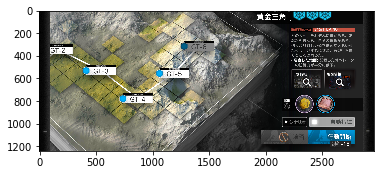

In [49]:
plt.imshow(start_array)

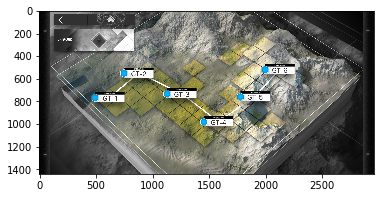

In [54]:
plt.imshow(map_array)

In [94]:
d = adb.device()
START_TIME = time()
for i in range(1000):
    print(i)
    loop_time = time()
    flag = 1
    while True:
        screen = read_png( get_screenshot(file_name="now.png"))
        os.remove("./now.png")
        if time() - loop_time > 300:
            print(str(time() - loop_time) + " has passed")
            sys.exit()
        elif abs(start_array - screen[200:, :, :]).mean() < 0.01:
            d.click(2555,1333)
            flag += 1
            print("start_find")
            print(time() - loop_time)
            print('='*20)
            sleep(1)
            d.click(2430,1000)
            print('sleeping')
            sleep(155)
            print("sleep finished")
            print(time() - loop_time)
            d.click(1500,200)
            sleep(3)
            break
        elif flag == 1 and abs((map_array - screen)).mean() < 0.01:
            #d.click(1920,746)
            d.click(2100,560)
            flag += 1
            print("map_find")
            print(time() - loop_time)
            print('='*20)
            print()
        else:
            d.click(1500,200)
            sleep(4)
            print("pass")
d.keyevent("HOME")

0
map_find
3.8877787590026855

pass
start_find
11.896535396575928
sleeping
sleep finished
168.333172082901
1
pass
map_find
9.42624545097351

pass
start_find
17.438019037246704
sleeping
sleep finished
173.87497472763062
2
pass
map_find
9.499693870544434

pass
start_find
17.4951069355011
sleeping
sleep finished
173.98987770080566
3
pass
start_find
11.257971048355103
sleeping
sleep finished
167.79082775115967
4
pass
start_find
11.082409143447876
sleeping
sleep finished
167.46924567222595
5
pass
map_find
10.033475399017334



KeyboardInterrupt: 

In [ ]:
def makeRangeSlider(max_n):
    # 範囲のスライダーを作る。2f%で計算しても良さそうだったけど、細かいところまで弄れるように画素単位にした。
    return IntRangeSlider(
    value=[0., max_n],
    min=0., max= max_n-1, step=1,
    description='xlim:',
    readout_format='.1d',
)

def cropImage(heightRange, widthRange):
    plt.figure(figsize=(20, 20))
    plt.imshow(capture_array[heightRange[0]:heightRange[1], widthRange[0]:widthRange[1]])

In [ ]:
capture_array = np.asarray(screen_capture)
#capture_array = np.array(test_image.getdata())
height, width = capture_array.shape[0], capture_array.shape[1]

interact(cropImage, heightRange = makeRangeSlider(height), widthRange = makeRangeSlider(width))

In [ ]:

"""
d.swipe(10, 10, 200, 2000, 0.5)
# swipe from(10, 10) to(200, 200) 500ms

d.send_keys("hello world$%^&*") #
d.click(100, 100)
# swipe from(10, 10) to(200, 200) 500ms
d.swipe(10, 10, 200, 200, 0.5)
d.list_packages()
# example output: ["com.example.hello"]
d.window_size()
# example output: (1080, 1920)
d.rotation()
# example output: 1
# other possible valus: 0, 1, 2, 3
d.package_info("com.github.uiautomator")
# example output: {"version_name": "1.1.7", "version_code": "1007"}
d.keyevent("HOME")
d.send_keys("hello world$%^&*") # simulate: adb shell input text "hello%sworld\%\^\&\*"
d.open_browser("https://www.baidu.com")
"""
